In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

Questions to address:

which are the most valuable customers? 

How can you identify a potentially valuable customer?

How can we segment customers to identify marketing groups?

What defines these segments and how should they be approached accordingly?


# Data import and cleaning

- Import data
- Understand general structure
- Manage nulls, duplicated, outliers, anomalies

In [2]:
data = pd.read_csv('data/ecommerce_consumer_behaviour.csv', nrows = 3500000)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [4]:
data.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [5]:
null_mask = data['days_since_prior_order'].isna()

We can see that 124,342 users don't have information on orders placed before. We will replace their nulls with -1, as it 

<AxesSubplot:xlabel='user_id', ylabel='Count'>

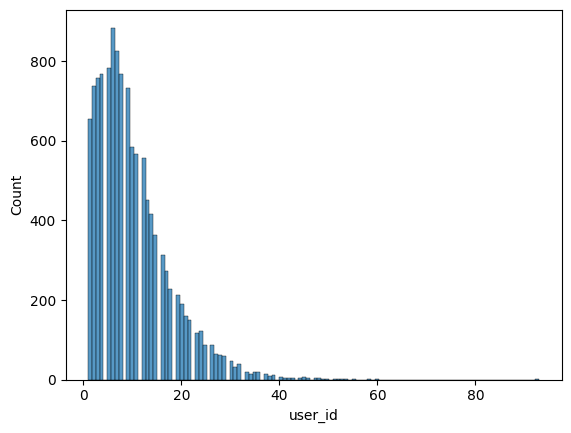

In [6]:
sns.histplot(data[null_mask]['user_id'].value_counts())

In [7]:
data[null_mask]['user_id'].nunique()

12254

In [8]:
data[null_mask]['user_id']

0           49125
1           49125
2           49125
3           49125
4           49125
            ...  
2019349    187116
2019350    187116
2019351    187116
2019352    187116
2019353    187116
Name: user_id, Length: 124342, dtype: int64

In [9]:
null_users = data[null_mask]['user_id'].tolist()
null_users_unique = list(set(null_users))
non_null = data[~null_mask]

8% of the data has nulls, we will fill these with '-1'

In [10]:
data.fillna(-1,inplace=True) 

In [11]:
data['days_since_prior_order']= data['days_since_prior_order'].astype('int64')

In [12]:
data.duplicated().sum()

0

No duplicates

In [13]:
data.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.062342e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,9.186271e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


K-means is very delicate for outliers so we want to check for these in every feature.

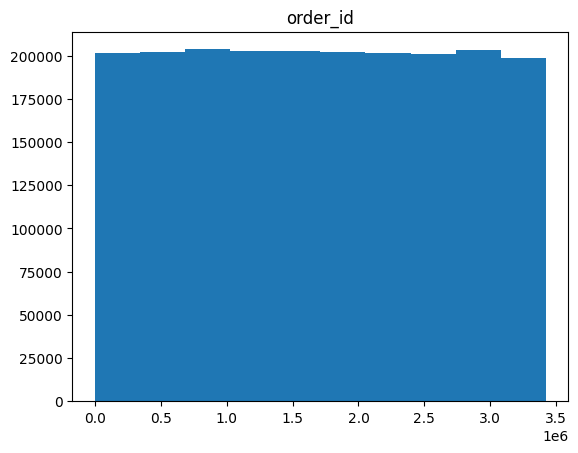

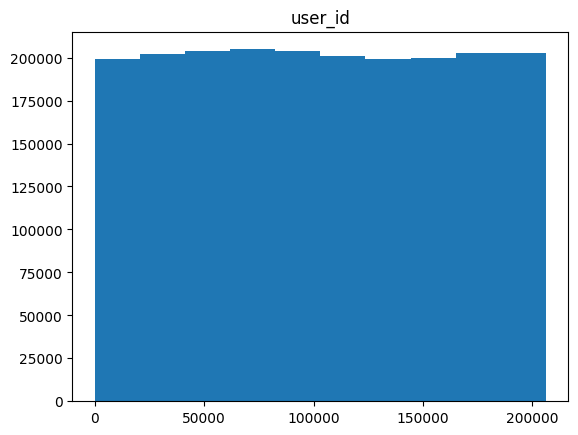

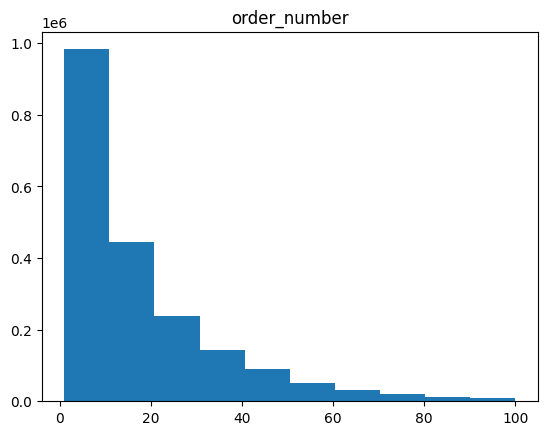

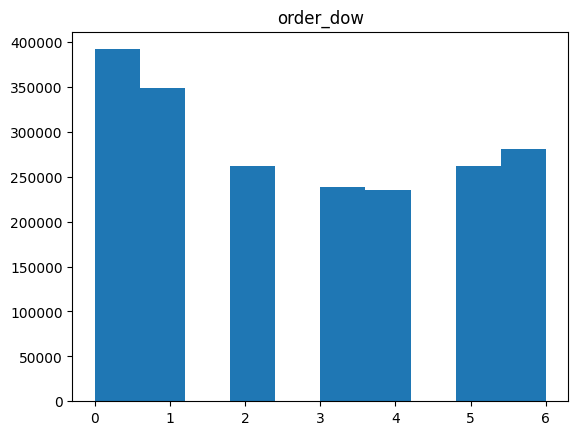

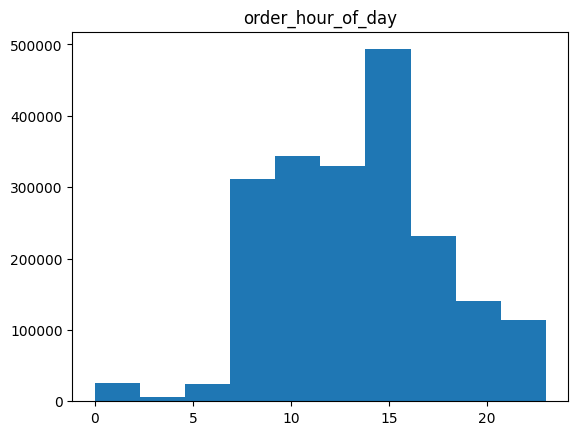

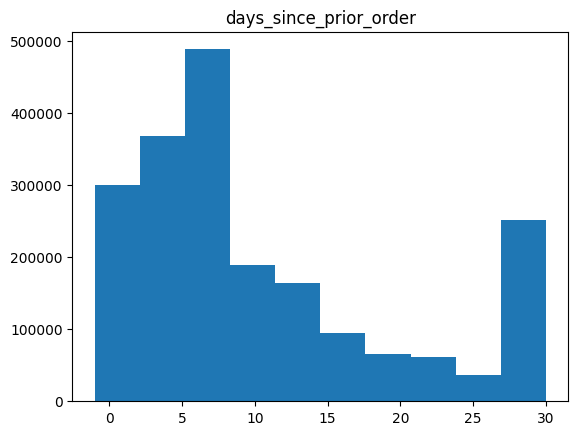

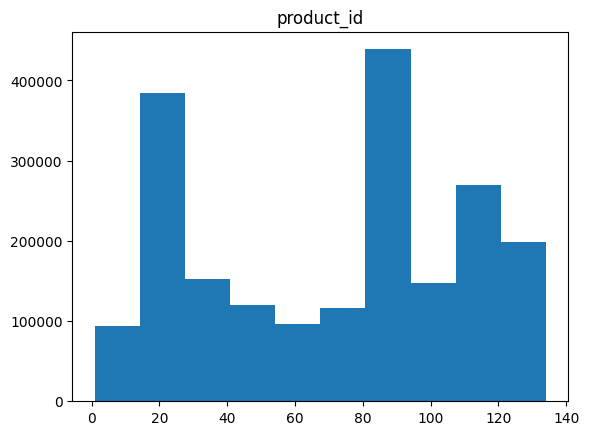

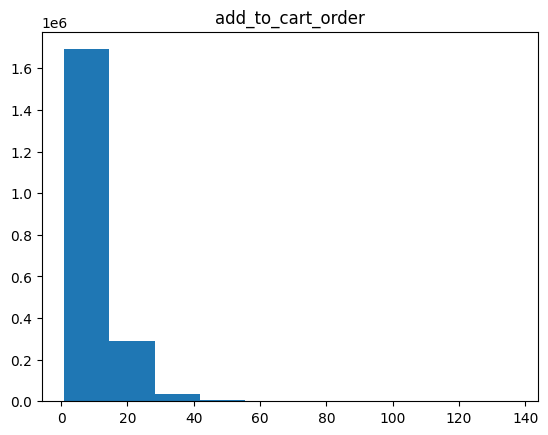

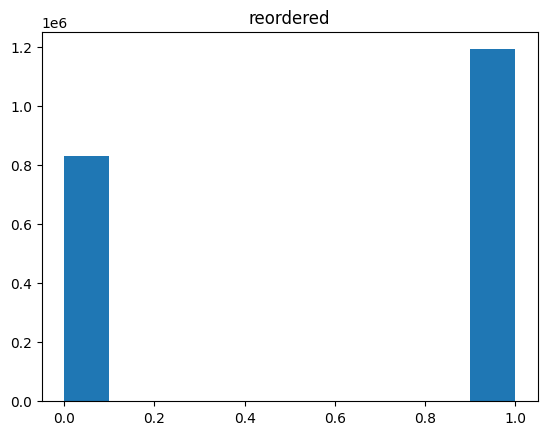

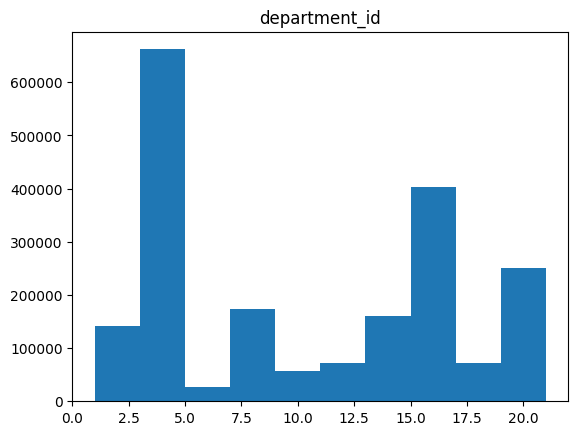

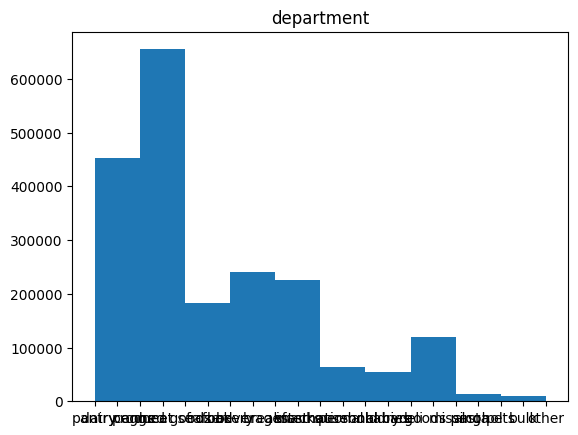

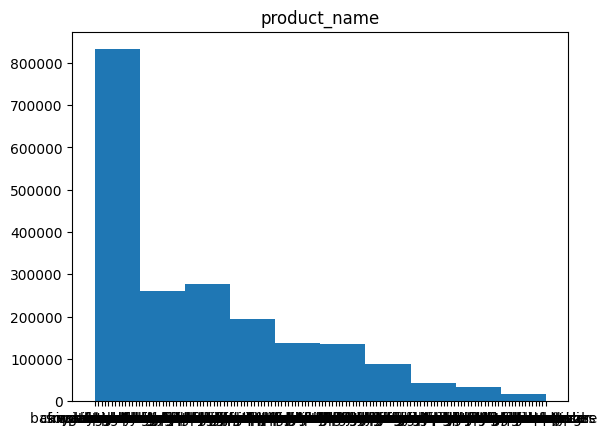

In [24]:
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

It looks like 'add_to_cart_order' has very few high values so we will check this out

(array([117.,   5.,   3.,   2.,   2.,   1.,   2.,   1.,   2.,   2.]),
 array([1.000000e+00, 2.000090e+04, 4.000080e+04, 6.000070e+04,
        8.000060e+04, 1.000005e+05, 1.200004e+05, 1.400003e+05,
        1.600002e+05, 1.800001e+05, 2.000000e+05]),
 <BarContainer object of 10 artists>)

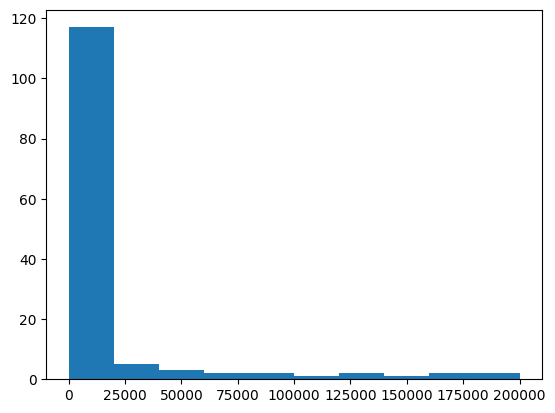

In [29]:
plt.hist(data['add_to_cart_order'].value_counts())

No obvious outliers or anomalies

# Data Preparation

In [31]:
data.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables


In [ ]:
Questions to address: 

- Encode data
- Scale data
- Restructure data
- Feature engineering

In [34]:
reorder_0 = data[data['reordered'] == 0]

In [36]:
reorder_0['user_id'].nunique()

94692

In [37]:
reorder_0['order_id'].nunique()

156963

## Grouping the data


In [39]:
for column in data:
    unique_values = np.unique(data[column])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(column, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(column, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

In [70]:
data[200:]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
200,1244093,104159,4,5,14,30,129,9,0,1,frozen,frozen appetizers sides
201,1244093,104159,4,5,14,30,52,10,0,1,frozen,frozen breakfast
202,1244093,104159,4,5,14,30,86,11,1,16,dairy eggs,eggs
203,2772240,82371,23,0,8,7,59,1,0,15,canned goods,canned meals beans
204,2772240,82371,23,0,8,7,59,2,0,15,canned goods,canned meals beans
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce


In [62]:
def most_common(series):
    lst = series.tolist()
    return max(set(lst), key=lst.count)

Beginning to analyse purchasing behaviour by different metrics

In [63]:
data_grouped = data.groupby(by = 'order_id').agg({'user_id' : most_common})

In [84]:
data_grouped = data.groupby(by = 'order_id')['add_to_cart_order'].max().reset_index()

In [85]:
data_grouped = data_grouped['add_to_cart_order'].value_counts()

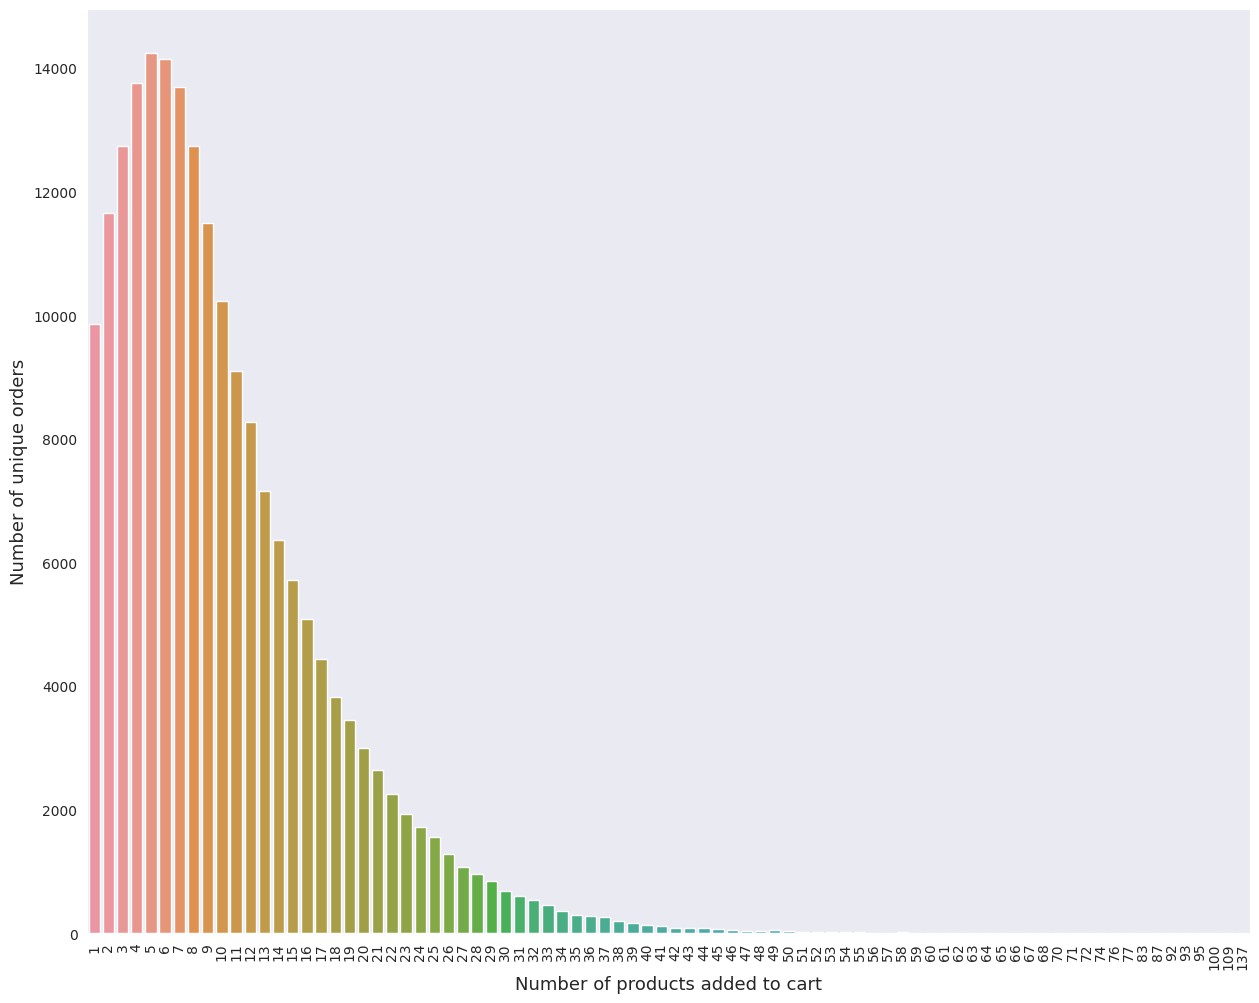

In [87]:
sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(data_grouped.index, data_grouped.values)
sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

In [89]:
data_grouped = data.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
data_grouped = data_grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
data_grouped

,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


We can see that fresh fruit/veg and dairy are the most reordered items by customers - visualising this below.

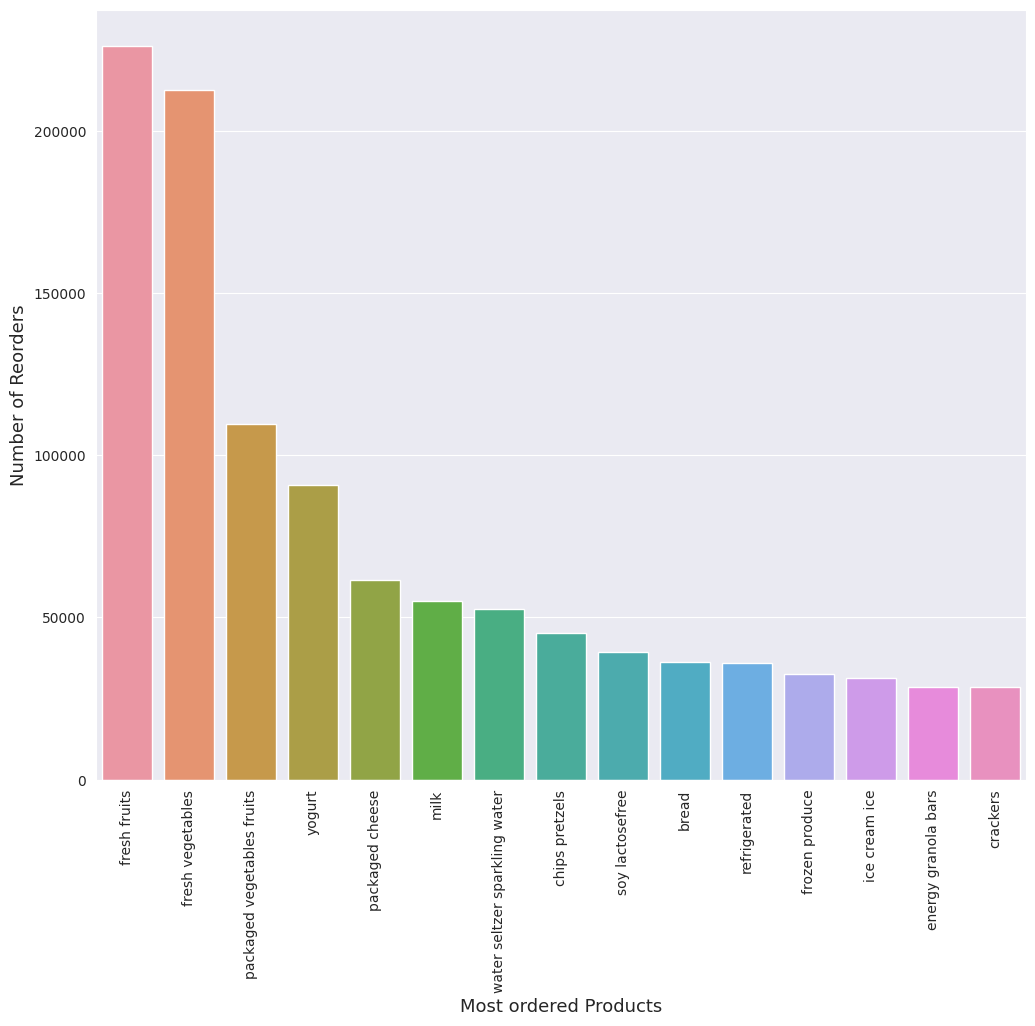

In [90]:
data_grouped  = data_grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(data_grouped.index, data_grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

Questions to explore:

- Do they purchase in the evenings or during the day?
- Do they purchase at weekends or during the week/ what is the weekly split for orders? 
- What is the ratio at which they reorder products (how predictable are they)?
- What is the average days since last order?
- What is their average order size?

In [112]:
data_grouped = data.groupby(by = 'order_id').agg({'user_id':'max',
                                                 'order_number':'max',
                                                 'order_dow': 'max',
                                                 'order_hour_of_day': 'max',
                                                 'days_since_prior_order': 'max',
                                                 'product_id' : most_common,
                                                  'add_to_cart_order': 'max',
                                                 'reordered' : 'mean',
                                                  'department_id' : most_common,
                                                  'product_name' : most_common
                                                 })

In [117]:
data_grouped.reset_index(inplace = True)

- Do they purchase in the evenings or during the day? Both items and orders.
- Do they purchase at weekends or during the week/ what is the weekly split for items and orders? 

In [ ]:
.agg(new_col_name=('col_name', 'agg_func'

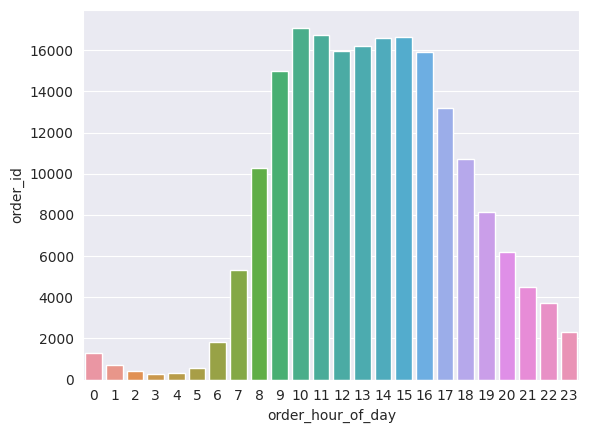

In [125]:
data_hod = data_grouped.groupby(by = 'order_hour_of_day').count()
sns.barplot(data_hod.index, data_hod['order_id']);

People mostly order between 9am and 5pm. Checking further to see if different customers order regularly at the same times

Group by average per user, also include standard deviation?

In [129]:
data_hod_dist = data_grouped.groupby(by = 'user_id').agg(
    average_hour = ('order_hour_of_day', 'mean'),
    std_hour = ('order_hour_of_day', 'std'))

In [130]:
data_hod_dist.fillna(0,inplace=True) 

In [131]:
data_hod_dist


,average_hour,std_hour
user_id,,
2,10.000000,0.000000
3,18.333333,0.577350
7,18.000000,0.000000
10,15.000000,0.000000
11,11.000000,0.000000
...,...,...
206204,8.000000,0.000000
206205,16.000000,0.000000
206206,17.250000,1.500000


In [134]:
(data['user_id'].nunique())/(data['order_id'].nunique())

0.526365

In [120]:
data_dow = data_grouped.groupby(by = 'order_dow').count()
data_dow

,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,product_name
order_dow,,,,,,,,,,
0,35078,35078,35078,35078,35078,35078,35078,35078,35078,35078
1,34348,34348,34348,34348,34348,34348,34348,34348,34348,34348
2,27277,27277,27277,27277,27277,27277,27277,27277,27277,27277
3,25670,25670,25670,25670,25670,25670,25670,25670,25670,25670
4,24974,24974,24974,24974,24974,24974,24974,24974,24974,24974
5,26557,26557,26557,26557,26557,26557,26557,26557,26557,26557
6,26096,26096,26096,26096,26096,26096,26096,26096,26096,26096


KeyboardInterrupt: 

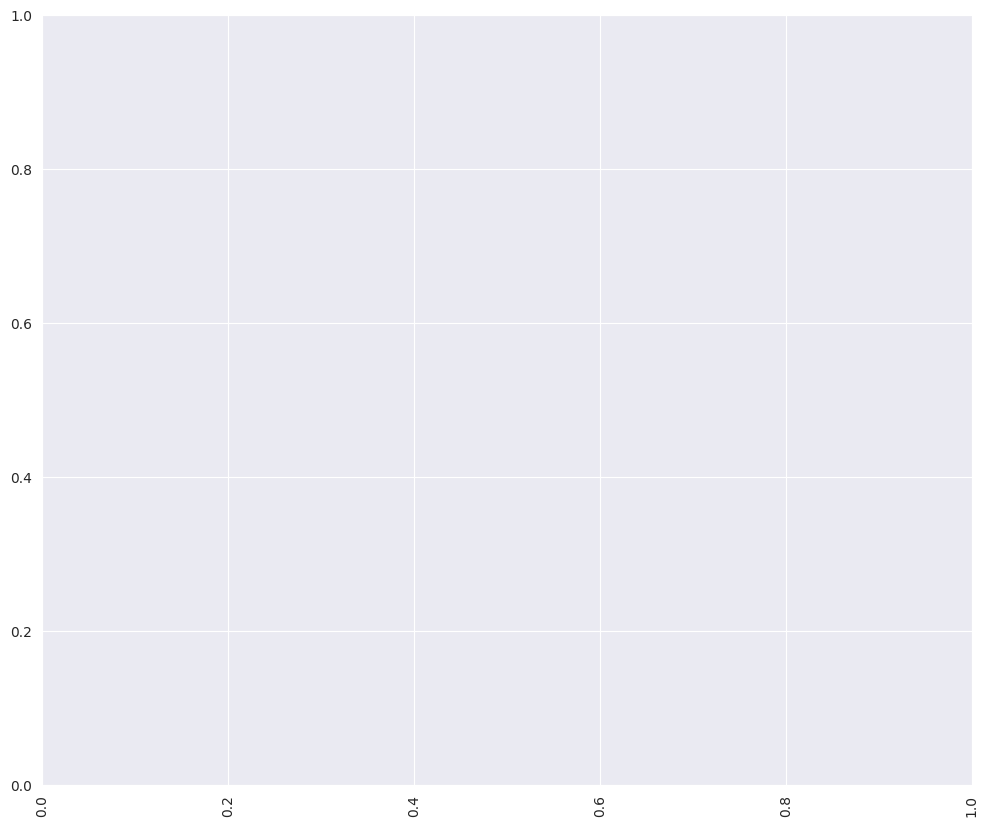

In [118]:


sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(data_grouped['order_id'], data_grouped['order_dow'])
# plt.ylabel('Number of Reorders', fontsize=13)
# plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

# Segmenting customers through K-means

Process:

- Feature engineering
- Scale the data
- Make the data numeric
- Feature selection (due to performance of model)

## Feature Selection

In [93]:
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables


We need to group by users. First we group by order then by users

In [102]:
def most_common(series):
    lst = series.tolist()
    return max(set(lst), key=lst.count)

In [111]:
data_grouped = data.groupby(by = 'order_id').agg({'user_id':'max',
                                                 'order_number':'max',
                                                 'order_dow': 'max',
                                                 'order_hour_of_day': 'max',
                                                 'days_since_prior_order': 'max',
                                                 'product_id' : most_common,
                                                  'add_to_cart_order': 'max',
                                                 'reordered' : 'mean',
                                                  'department_id' : most_common,
                                                  'product_name' : most_common
                                                 })

In [109]:
data_grouped.reset_index()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,department_id,product_name
0,10,135442,4,6,8,8,83,0.533333,4,fresh vegetables
1,11,143742,4,1,19,23,67,1.000000,1,frozen meals
2,28,98256,29,3,13,6,24,0.875000,16,fresh fruits
3,38,42756,6,6,16,24,16,0.111111,4,fresh herbs
4,56,41591,8,0,12,2,105,0.700000,4,doughs gelatins bake mixes
...,...,...,...,...,...,...,...,...,...,...
199995,3420991,186459,16,1,9,7,24,0.615385,4,fresh fruits
199996,3421019,47149,22,5,10,3,108,0.666667,16,canned meals beans
199997,3421027,51127,64,2,20,2,24,0.750000,4,fresh fruits
199998,3421074,167185,5,4,8,6,42,0.250000,16,tofu meat alternatives


What insights could we gain about customers from this data with regards to segmentation? What questions should we investigate?

- Do they purchase in the evenings or during the day?
- Do they purchase at weekends or during the week/ what is the weekly split for orders? 
- What is the ratio at which they reorder products (how predictable are they)?
- What is the average days since last order?
- What is their average order size?

Noting that 'department' and 'product_name' are categorical so need to be excluded with K-means. Can consider using K-prototypes at a future point to include this data

In [91]:
clst_prd = pd.crosstab(data['user_id'], data['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4
